In [27]:
# pip install opendatasets --upgrade
# Way of downloading dataset using credentials from kaggle
import opendatasets as od
od.download("https://www.kaggle.com/competitions/histopathologic-cancer-detection")

Skipping, found downloaded files in ".\histopathologic-cancer-detection" (use force=True to force download)


In [29]:
import zipfile
with zipfile.ZipFile("./histopathologic-cancer-detection/histopathologic-cancer-detection.zip", 'r') as zip_ref:
    zip_ref.extractall("./histopathologic-cancer-detection/")

Directory is empty. Zipping file...


In [5]:
# I wanted to divide train, test_eval, unseen images to own folders
import os

def mkdir_if_not_exist(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        
# train
train_location = "./data/train/"
mkdir_if_not_exist(train_location)
mkdir_if_not_exist(train_location + "cancerous")
mkdir_if_not_exist(train_location + "non-cancerous")
# test_eval
test_eval_location = "./data/test_eval/"
mkdir_if_not_exist(test_eval_location)
mkdir_if_not_exist(test_eval_location + "cancerous")
mkdir_if_not_exist(test_eval_location + "non-cancerous")
# unseen
unseen_location = "./data/unseen/"
mkdir_if_not_exist(unseen_location)
mkdir_if_not_exist(unseen_location + "cancerous")
mkdir_if_not_exist(unseen_location + "non-cancerous")

In [1]:
import pandas as pd
image_data = pd.read_csv('./histopathologic-cancer-detection/train_labels.csv')

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0


,id,label
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0
220024,a81f84895ddcd522302ddf34be02eb1b3e5af1cb,1


Types of different labels: 
0    130908
1     89117
Name: label, dtype: int64
----------------------------------------------------------------------
Total number of images: 220025
Total number of cancerous images: 89117
Total number of non cancerous images: 130908
----------------------------------------------------------------------
Cancerous image percentage 40.5031 %
Non cancerous image percentage 59.4969 %


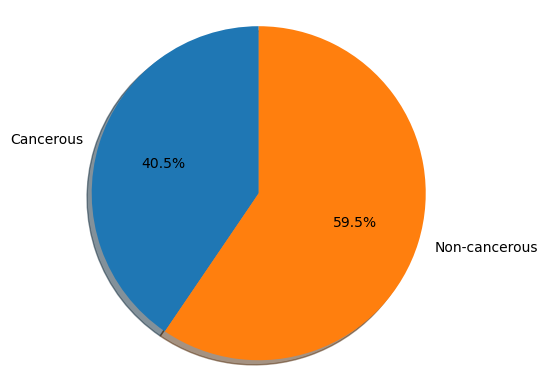

In [22]:
# Facts about the data that we are using in this exercise
display(image_data.head(3))
display(image_data.tail(3))

total_number_of_images = len(image_data)

counts_by_type = image_data['label'].value_counts()

print(f"Types of different labels: \n{counts_by_type}")
# Seems that data is in good shape so just 0 and 1 in labels

total_number_of_cancerous_images = counts_by_type[1]
total_number_of_non_cancerous_images = counts_by_type[0]
print("----------------------------------------------------------------------")
print(f"Total number of images: {total_number_of_images}")
print(f"Total number of cancerous images: {total_number_of_cancerous_images}")
print(f"Total number of non cancerous images: {total_number_of_non_cancerous_images}")
print("----------------------------------------------------------------------")
print(f"Cancerous image percentage {round(total_number_of_cancerous_images / total_number_of_images * 100, 4)} %")
print(f"Non cancerous image percentage {round(total_number_of_non_cancerous_images / total_number_of_images * 100, 4)} %")

import matplotlib.pyplot as plt

# Pie chart
labels = 'Cancerous', 'Non-cancerous'
sizes = [total_number_of_cancerous_images, total_number_of_non_cancerous_images]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [2]:
# Check that image data is fine
from PIL import Image
import os

image_dimensions = set()
directory = "./histopathologic-cancer-detection/train/"

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        img = Image.open(f)
        image_dimensions.add(img.size)
        
print(image_dimensions)
# {(96, 96)} so all images are same sized so I don't need to standardize that

{(96, 96)}


In [4]:
# Lets do division to folders in 80:10:10 ratio (train, test_eval, unseen)
import random
import shutil
for index, row in image_data.iterrows():
    
    fileName = row["id"] + ".tif"
    
    random_number = random.random()
    
    if random_number < 0.8:
        location = train_location
    elif random_number < 0.9:
        location = test_eval_location
    else:
        location = unseen_location
        
    
    if row["label"] == 1:
        shutil.copy("./histopathologic-cancer-detection/train/" + fileName, location + "cancerous/" + fileName)
    else:
        shutil.copy("./histopathologic-cancer-detection/train/"  + fileName, location + "non-cancerous/" + fileName)

In [6]:
def count_files_in_dir(path):
    totalFiles = 0
    for base, dirs, files in os.walk(path):
        for Files in files:
            totalFiles += 1
    return totalFiles

all_pictures = count_files_in_dir("./data/")
files_in_train = count_files_in_dir(train_location)
files_in_test_eval = count_files_in_dir(test_eval_location)
files_in_unseen = count_files_in_dir(unseen_location)

print(f"{files_in_train} in train folder")
print(f"{files_in_test_eval} in test_eval folder")
print(f"{files_in_unseen} in unseen folder")
print("---------------------------------")
print(f"{round(files_in_train / all_pictures * 100, 4)} % in train folder")
print(f"{round(files_in_test_eval / all_pictures * 100, 4)} % in test folder")
print(f"{round(files_in_unseen / all_pictures * 100, 4)} % in unseen folder")
#OK seems that divisiom went fine

176291 in train folder
22017 in test_eval folder
21717 in unseen folder
---------------------------------
80.1232 % in train folder
10.0066 % in test folder
9.8702 % in unseen folder


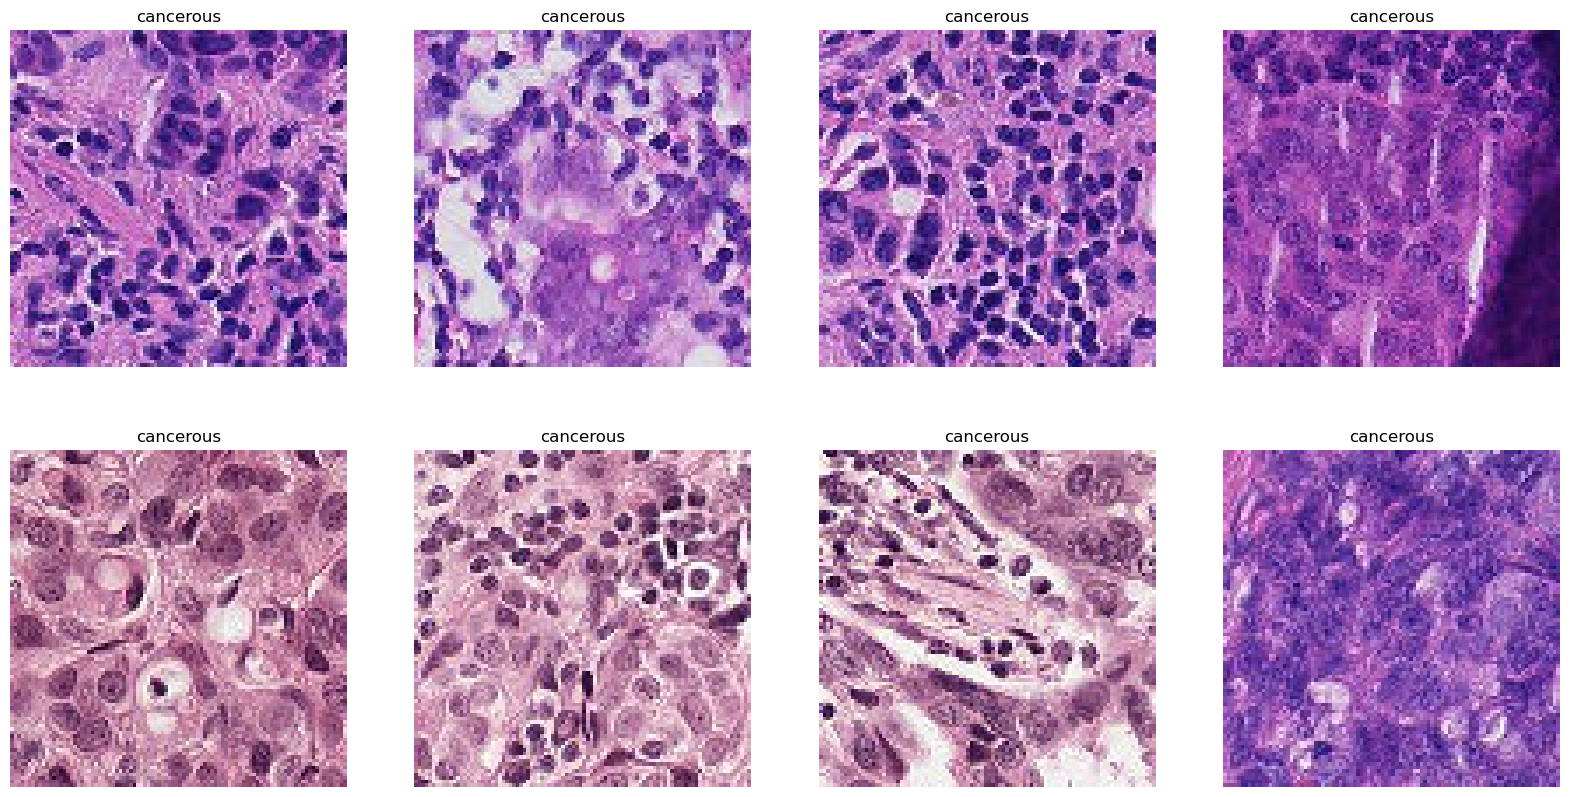

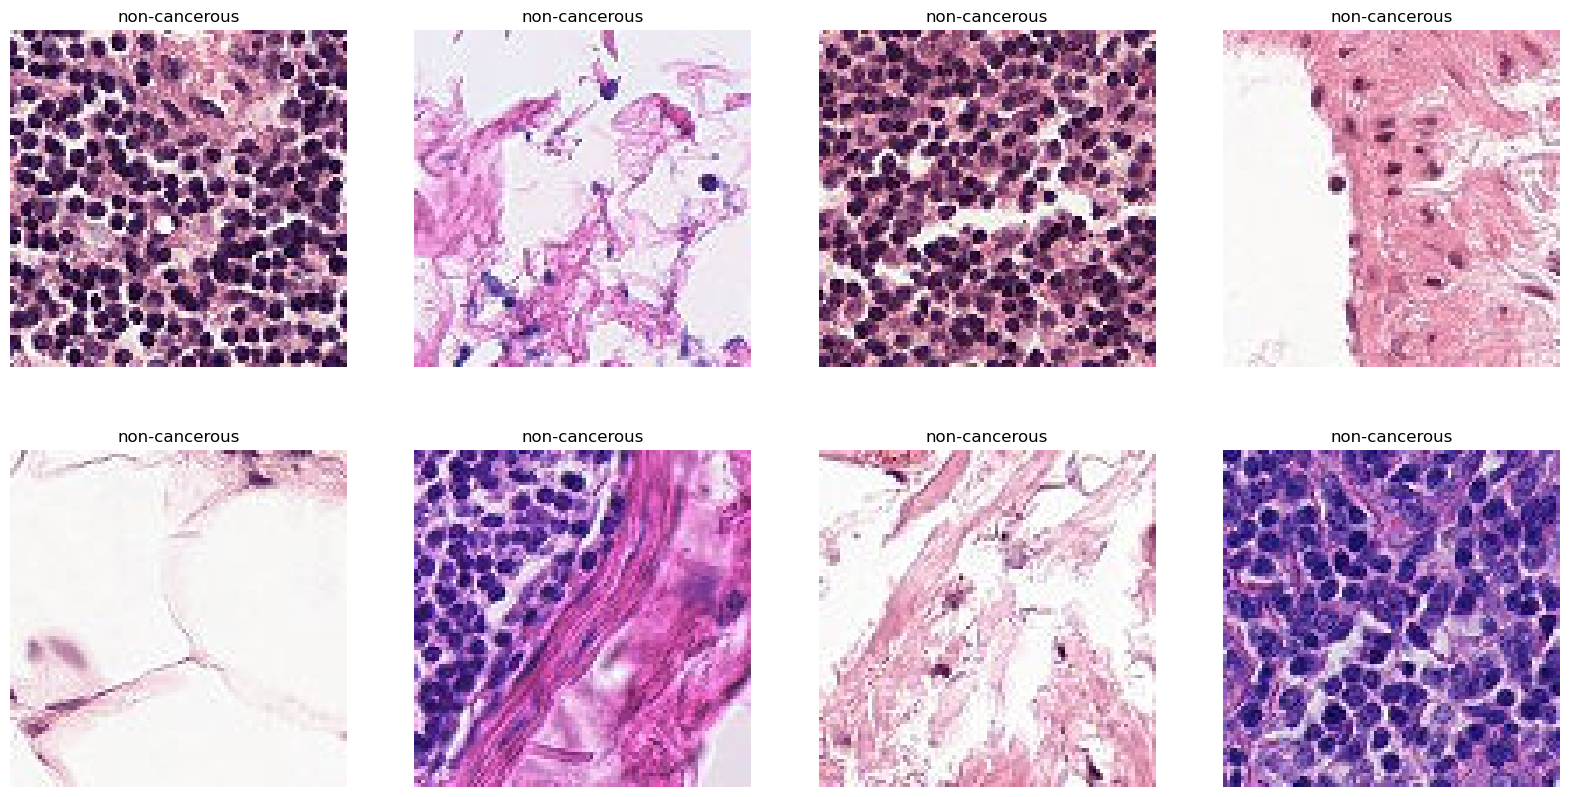

In [18]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def show_images_by_type(type):
    images = []
    counter = 0
    for img_path in glob.glob(train_location + type +'/*.tif'):
        if counter > 7:
            break
        images.append(mpimg.imread(img_path))
        counter += 1

    plt.figure(figsize=(20,10))
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        plt.imshow(image)
        plt.title(type)

show_images_by_type("cancerous")
show_images_by_type("non-cancerous")